# Probability Plotting

Probability plotting is a method of estimating, the old fashioned way (paper and pencil) the parameters of an assumed distribution.

The Surpyval module uses the least squares onto the probability plot (except for the Gamma distribution) for the 'MPP' method.

Although on most occassions it is sensible to use the Maximum Likelihood Estimate, it is prudent to check that your fitted model resembles your data. The plot function of the parametric distribution does exctly that. It plots the transformed non parametric CDF with the line of best fit for that model over the top. This allows you to do a quick sense check on the fit. Demonstrated in this notebook is some of the results you can achieve with the Surpyval module.

In [1]:
import surpyval as surv
import numpy as np
import matplotlib.pyplot as plt

Using a ball bearing failure time data set from Lieblein and Zelen (1956). Can be found [here](https://www.scirp.org/(S(i43dyn45teexjx455qlt3d2q))/reference/ReferencesPapers.aspx?ReferenceID=1160549)

In [2]:
x = [17.88, 28.92, 33, 41.52, 42.12, 45.6, 48.4, 51.84, 
     51.96, 54.12, 55.56, 67.8, 68.64, 68.64, 68.88, 84.12, 
     93.12, 98.64, 105.12, 105.84, 127.92, 128.04, 173.4]

(81.87455823238459, 2.1018468675175694)

/opt/anaconda3/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


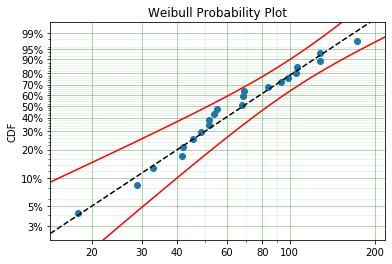

In [3]:
model = surv.parametric.Weibull.fit(x, how='MLE',rr='y')
model.plot(heuristic='Nelson-Aalen', plot_bounds=True);
model.params

Using data from the man the distribution is named after! Weibull uses data on the tensile strength of bofors steel. Data can be accessed [here](https://pdfs.semanticscholar.org/88c3/7770028e7ed61180a34d6a837a9a4db3b264.pdf)

(7.662509954685113, 2.393011093513511, 39.174282482621194)

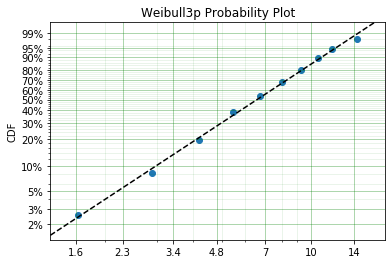

In [4]:
x = np.array([32, 33, 34, 35, 36, 37, 38, 39, 40, 42]) * 1.275
n = np.array([10, 33, 81, 161, 224, 289, 336, 369, 383, 389])
c = None
# Mr Weibull's measurements are cumulative, so let's calculate the obervations at each point.
n = np.concatenate([[n[0]], np.diff(n)])

weib_3p = surv.parametric.Weibull3p.fit(x, n=n, how='MPP',rr='y')
weib_3p.plot(heuristic='Nelson-Aalen', plot_bounds=False);
weib_3p.params

In [5]:
n

array([10, 23, 48, 80, 63, 65, 47, 33, 14,  6])

(7.679041753378017, 1.7840054400078986, 39.81362413930664)

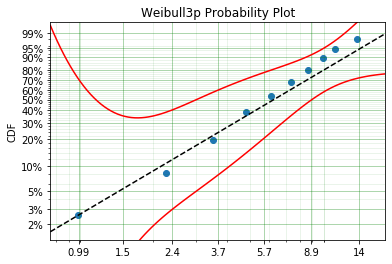

In [6]:
weib_3p = surv.parametric.Weibull3p.fit(x, n=n, how='MLE',rr='y')
weib_3p.plot(heuristic='Nelson-Aalen', plot_bounds=True);
weib_3p.params

(90.30749590771771, 1.976178684276458, 18.712356110641416)


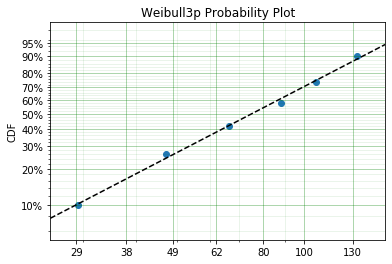

In [7]:
x = np.array([48, 66, 85, 107, 125, 152])
weib_3p = surv.parametric.Weibull3p.fit(x, how='MPP', heuristic='Blom')
print(weib_3p.params)
weib_3p.plot(heuristic='Blom', plot_bounds=False);

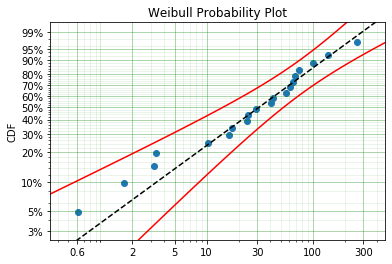

In [8]:
x = surv.parametric.Weibull.random(20, 50, 0.8)

model = surv.parametric.Weibull.fit(x, how='MLE')
model.plot(heuristic='Nelson-Aalen');

We might also have a scenario where the reliability could be best modelled as a mixture of two Weibull distributions.

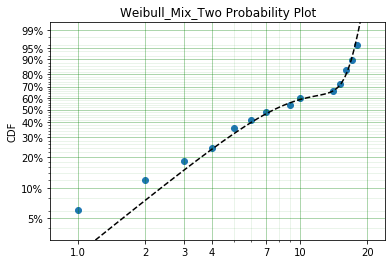

In [9]:
x = [1, 2, 3, 4, 5, 5, 6, 7, 9, 10, 14, 15, 16, 16, 17, 18]
model = surv.parametric.Weibull_Mix_Two.fit(x)
model.plot('Nelson-Aalen', plot_bounds=False);

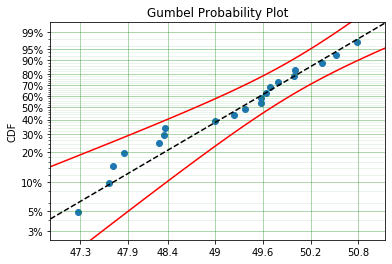

In [10]:
x = surv.parametric.Gumbel.random(20, 50, 0.8)

model = surv.parametric.Gumbel.fit(x, how='MLE')
model.plot(heuristic='Fleming-Harrington');

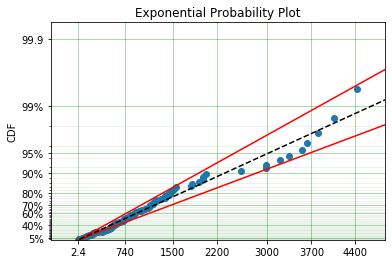

In [11]:
dist = surv.parametric.Exponential
x = dist.random(100, 1e-3)

model = dist.fit(x, how='MLE')
model.plot(heuristic='Nelson-Aalen');

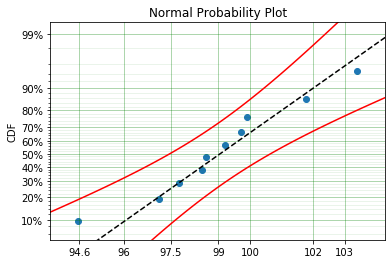

In [12]:
dist = surv.parametric.Normal
x = dist.random(10, 100, 4)

model = dist.fit(x, how='MLE')
model.plot(heuristic='Nelson-Aalen');

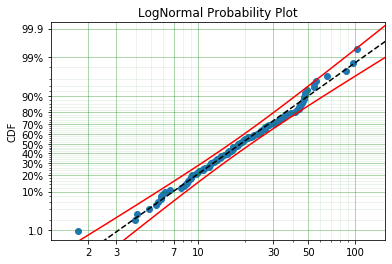

In [13]:
dist = surv.parametric.LogNormal
x = dist.random(100, 3, 0.8)

model = dist.fit(x, how='MLE')
model.plot(heuristic='Nelson-Aalen', cb=0.05);

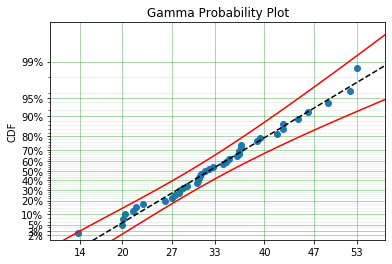

In [14]:
dist = surv.parametric.Gamma
x = dist.random(40, 10, 0.3)

model = dist.fit(x, how='MLE')
model.plot(heuristic='Nelson-Aalen');

(-3.000802297005904, 23.732930704789243)

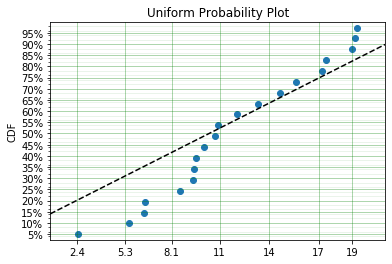

In [15]:
dist = surv.parametric.Uniform
x = dist.random(20, 1, 20)

model = dist.fit(x, how='MOM')
model.plot(heuristic='Nelson-Aalen', plot_bounds=False);
model.params

(2.708230349313831, 18.26656554395418)

/Users/DerrynKnife1/Projects/surpyval/surpyval/parametric/__init__.py:944: RuntimeWarning: divide by zero encountered in true_divide
  return -np.log(1./y - 1)


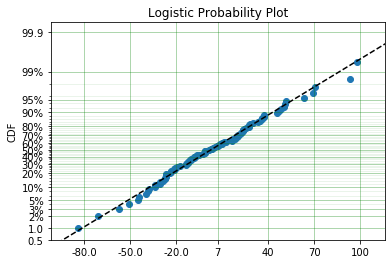

In [16]:
dist = surv.parametric.Logistic
x = dist.random(100, 1, 20)

model = dist.fit(x, how='MLE')
model.plot(heuristic='Nelson-Aalen', plot_bounds=False);
model.params

/Users/DerrynKnife1/Projects/surpyval/surpyval/parametric/__init__.py:983: RuntimeWarning: invalid value encountered in power
  return 1. / (1 + (x/alpha)**-beta)
/Users/DerrynKnife1/Projects/surpyval/surpyval/parametric/surpyval_dist.py:37: RuntimeWarning: invalid value encountered in less
  D[D < TINIEST] = TINIEST


(10.802065967458097, 0.8565442458061719)

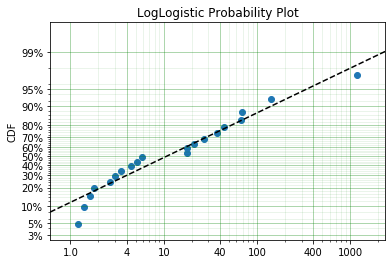

In [21]:
dist = surv.parametric.LogLogistic
x = dist.random(20, 10, 0.9)

model = dist.fit(x, how='MPS')
model.plot(heuristic='Nelson-Aalen', plot_bounds=False);
model.params

In [18]:
from surpyval.nonparametric import turnbull

In [19]:
low = np.array([0, 0, 0, 4, 5, 5, 6, 7, 7, 11, 11, 15, 17, 17, 
                17, 18, 19, 18, 22, 24, 24, 25, 26, 27, 32, 33, 
                34, 36, 36, 36, 36, 37, 37, 37, 37, 38, 40, 45, 
                46, 46, 46, 46, 46, 46, 46, 46])
upp = np.array([7, 8, 5, 11, 12, 11, 10, 16, 14, 15, 18, np.inf, 
                np.inf, 25, 25, np.inf, 35, 26, np.inf, np.inf, 
                np.inf, 37, 40, 34, np.inf, np.inf, np.inf, 44, 
                48, np.inf, np.inf, 44, np.inf, np.inf, np.inf, 
                np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 
                np.inf, np.inf, np.inf, np.inf, np.inf])

(0, 1)

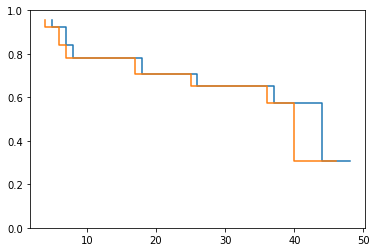

In [20]:
a, p, d, r = turnbull(low, upp)
#R = np.cumprod(1 - (d/r))
R = np.cumprod(1 - p)
plt.step(np.array(a)[:, 1], R)
plt.step(np.array(a)[:, 0], R)
plt.ylim((0, 1))